#SINDY PI Applied to Double Pendulum with Friction Simulation

SINDy PI Equation:

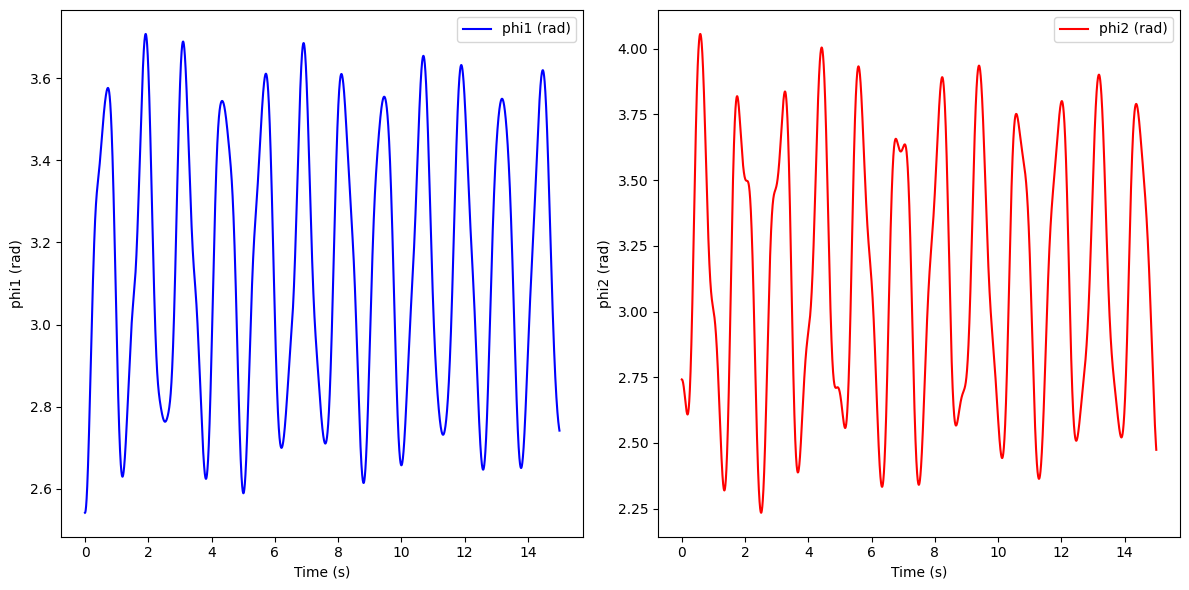

In [ ]:
import numpy as np

def double_pendulum_ode(t, y, m1, m2, a1, a2, L1, I1, I2, k1, k2, g):
    """
    ODE function for a damped double pendulum system.
    y = [phi1, phi2, phi1_dot, phi2_dot]
    """
    phi1, phi2, phi1_dot, phi2_dot = y

    # Common denominator
    denom = (I1 * I2 + L1**2 * a2**2 * m2**2 + I2 * L1**2 * m2 + I2 * a1**2 * m1 +
             I1 * a2**2 * m2 - L1**2 * a2**2 * m2**2 * np.cos(phi1 - phi2)**2 + a1**2 * a2**2 * m1 * m2)

    # Equations for phi1_ddot
    phi1_ddot = (-(I2 * k1 * phi1_dot + I2 * k2 * phi1_dot - I2 * k2 * phi2_dot +
                  a2**2 * k1 * m2 * phi1_dot + a2**2 * k2 * m2 * phi1_dot - a2**2 * k2 * m2 * phi2_dot +
                  L1 * a2**3 * m2**2 * phi2_dot**2 * np.sin(phi1 - phi2) -
                  (L1 * a2**2 * g * m2**2 * np.sin(phi1)) / 2 - I2 * L1 * g * m2 * np.sin(phi1) -
                  (L1 * a2**2 * g * m2**2 * np.sin(phi1 - 2 * phi2)) / 2 - I2 * a1 * g * m1 * np.sin(phi1) +
                  (L1**2 * a2**2 * m2**2 * phi1_dot**2 * np.sin(2 * phi1 - 2 * phi2)) / 2 +
                  L1 * a2 * k2 * m2 * phi1_dot * np.cos(phi1 - phi2) -
                  L1 * a2 * k2 * m2 * phi2_dot * np.cos(phi1 - phi2) -
                  a1 * a2**2 * g * m1 * m2 * np.sin(phi1) +
                  I2 * L1 * a2 * m2 * phi2_dot**2 * np.sin(phi1 - phi2))) / denom

    # Equations for phi2_ddot
    phi2_ddot = ((I1 * k2 * phi1_dot - I1 * k2 * phi2_dot + L1**2 * k2 * m2 * phi1_dot -
                  L1**2 * k2 * m2 * phi2_dot + a1**2 * k2 * m1 * phi1_dot -
                  a1**2 * k2 * m1 * phi2_dot +
                  L1**3 * a2 * m2**2 * phi1_dot**2 * np.sin(phi1 - phi2) +
                  L1**2 * a2 * g * m2**2 * np.sin(phi2) +
                  I1 * a2 * g * m2 * np.sin(phi2) +
                  (L1**2 * a2**2 * m2**2 * phi2_dot**2 * np.sin(2 * phi1 - 2 * phi2)) / 2 +
                  L1 * a2 * k1 * m2 * phi1_dot * np.cos(phi1 - phi2) +
                  L1 * a2 * k2 * m2 * phi1_dot * np.cos(phi1 - phi2) -
                  L1 * a2 * k2 * m2 * phi2_dot * np.cos(phi1 - phi2) -
                  L1**2 * a2 * g * m2**2 * np.cos(phi1 - phi2) * np.sin(phi1) +
                  a1**2 * a2 * g * m1 * m2 * np.sin(phi2) +
                  I1 * L1 * a2 * m2 * phi1_dot**2 * np.sin(phi1 - phi2) +
                  L1 * a1**2 * a2 * m1 * m2 * phi1_dot**2 * np.sin(phi1 - phi2) -
                  L1 * a1 * a2 * g * m1 * m2 * np.cos(phi1 - phi2) * np.sin(phi1))) / denom

    # dydt
    dydt = [phi1_dot, phi2_dot, phi1_ddot, phi2_ddot]
    return dydt

# Example usage
if __name__ == "__main__":
    from scipy.integrate import solve_ivp
    import matplotlib.pyplot as plt

    # Parameters
    m1, m2 = 0.2704, 0.2056
    a1, a2 = 0.191, 0.1621
    L1 = 0.2667
    I1, I2 = 0.003, 0.0011
    k1, k2 = 0.00072484, 0.00016522
    g = 9.81

    # Initial conditions [phi1, phi2, phi1_dot, phi2_dot]
    y0 = [np.pi - 0.6, np.pi - 0.4, 0, 0]

    # Time span and time step
    t_span = (0, 15)
    t_eval = np.linspace(t_span[0], t_span[1], int(15 / 0.001))

    # Solve ODE
    sol = solve_ivp(double_pendulum_ode, t_span, y0, args=(m1, m2, a1, a2, L1, I1, I2, k1, k2, g), t_eval=t_eval)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot phi1
    axs[0].plot(sol.t, sol.y[0], label='phi1 (rad)', color='b')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('phi1 (rad)')
    axs[0].legend()

    # Plot phi2
    axs[1].plot(sol.t, sol.y[1], label='phi2 (rad)', color='r')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('phi2 (rad)')
    axs[1].legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

Step 1: Define the state (X) and its derivative (X_dot)

In [ ]:
#Extract angular positions and velocities

phi1 = sol.y[0]  # Angular position of the first pendulum (phi1)
phi2 = sol.y[1]  # Angular position of the second pendulum (phi2)
phi1_dot = sol.y[2]  # Angular velocity of the first pendulum (phi1_dot)
phi2_dot = sol.y[3]  # Angular velocity of the second pendulum (phi2_dot)

# Combine the angular positions and velocities to form x (position) and x_dot (velocity)
X = np.vstack([phi1, phi2]).T  # Stack phi1 and phi2 as columns (two positions)
X_dot = np.vstack([phi1_dot, phi2_dot]).T  # Stack phi1_dot and phi2_dot as columns (two velocities)

In [ ]:
import pandas as pd
# Create a pandas DataFrame for display purposes only
df_X = pd.DataFrame(X, columns=['phi1', 'phi2'])
df_X_dot = pd.DataFrame(X_dot, columns=['phi1_dot', 'phi2_dot'])

In [ ]:
df_X.head()

,phi1,phi2
0,2.541593,2.741593
1,2.541606,2.741585
2,2.541646,2.741561
3,2.541712,2.741521
4,2.541805,2.741465


In [ ]:
df_X_dot.head()

,phi1_dot,phi2_dot
0,0.000000,0.000000
1,0.026504,-0.015926
2,0.053005,-0.031846
3,0.079501,-0.047758
4,0.105991,-0.063661


Step 2: Build the candidate library Theta(X)

In [ ]:
import numpy as np

# Add functions like x, x^2, sin(x) to the library
def build_library(X, X_dot):
    phi1, phi2 = X[:, 0], X[:, 1]
    phi1_dot, phi2_dot = X_dot[:, 0], X_dot[:, 1]

    # Dictionary of base terms (without the constants)
    terms = {
        'sin(phi1)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(phi1),
        'sin(phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(phi2),
        'sin(phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(phi1 - phi2),
        'sin(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(phi1 - 2 * phi2),
        'sin(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(2 * phi1 - phi2),
        'sin(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.sin(2 * phi1 - 2 * phi2),
        'cos(phi1)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi1),
        'cos(phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi2),
        'cos(phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi1 - phi2),
        'cos(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi1 - 2 * phi2),
        'cos(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(2 * phi1 - phi2),
        'cos(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(2 * phi1 - 2 * phi2),
        'cos(phi1 - phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi1 - phi2) ** 2,
        'cos(phi1 - 2*phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(phi1 - 2 * phi2) ** 2,
        'cos(2*phi1 - phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(2 * phi1 - phi2) ** 2,
        'cos(2*phi1 - 2*phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: np.cos(2 * phi1 - 2 * phi2) ** 2,
        'phi1_dot': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot,
        'phi2_dot': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot,
        'phi1_dot*sin(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.sin(phi1 - 2 * phi2),
        'phi1_dot*sin(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.sin(2 * phi1 - phi2),
        'phi1_dot*sin(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.sin(2 * phi1 - 2 * phi2),
        'phi2_dot*sin(phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot * np.sin(phi1 - phi2),
        'phi2_dot*sin(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot * np.sin(phi1 - 2 * phi2),
        'phi2_dot*sin(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot * np.sin(2 * phi1 - phi2),
        'phi2_dot*sin(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot * np.sin(2 * phi1 - 2 * phi2),
        'phi1_dot^2*sin(phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot ** 2 * np.sin(phi1 - phi2),
        'phi1_dot^2*sin(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot ** 2 * np.sin(phi1 - 2 * phi2),
        'phi1_dot^2*sin(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot ** 2 * np.sin(2 * phi1 - phi2),
        'phi1_dot^2*sin(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot ** 2 * np.sin(2 * phi1 - 2 * phi2),
        'phi2_dot^2*sin(phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot ** 2 * np.sin(phi1 - phi2),
        'phi2_dot^2*sin(phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot ** 2 * np.sin(phi1 - 2 * phi2),
        'phi2_dot^2*sin(2*phi1 - phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot ** 2 * np.sin(2 * phi1 - phi2),
        'phi2_dot^2*sin(2*phi1 - 2*phi2)': lambda phi1, phi2, phi1_dot, phi2_dot: phi2_dot ** 2 * np.sin(2 * phi1 - 2 * phi2),
        'phi1_dot*cos(phi1 - phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.cos(phi1 - phi2) ** 2,
        'phi1_dot*cos(phi1 - 2*phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.cos(phi1 - 2 * phi2) ** 2,
        'phi1_dot*cos(2*phi1 - phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.cos(2 * phi1 - phi2) ** 2,
        'phi1_dot*cos(2*phi1 - 2*phi2)^2': lambda phi1, phi2, phi1_dot, phi2_dot: phi1_dot * np.cos(2 * phi1 - 2 * phi2) ** 2
    }

    # Evaluate all terms in the dictionary and stack them into a library
    library = np.column_stack([
        func(phi1, phi2, phi1_dot, phi2_dot) for func in terms.values()
    ])

    return library, terms

Theta_X, terms = build_library(X, X_dot)
term_labels = list(terms.keys())
print(term_labels)

['sin(phi1)', 'sin(phi2)', 'sin(phi1 - phi2)', 'sin(phi1 - 2*phi2)', 'sin(2*phi1 - phi2)', 'sin(2*phi1 - 2*phi2)', 'cos(phi1)', 'cos(phi2)', 'cos(phi1 - phi2)', 'cos(phi1 - 2*phi2)', 'cos(2*phi1 - phi2)', 'cos(2*phi1 - 2*phi2)', 'cos(phi1 - phi2)^2', 'cos(phi1 - 2*phi2)^2', 'cos(2*phi1 - phi2)^2', 'cos(2*phi1 - 2*phi2)^2', 'phi1_dot', 'phi2_dot', 'phi1_dot*sin(phi1 - 2*phi2)', 'phi1_dot*sin(2*phi1 - phi2)', 'phi1_dot*sin(2*phi1 - 2*phi2)', 'phi2_dot*sin(phi1 - phi2)', 'phi2_dot*sin(phi1 - 2*phi2)', 'phi2_dot*sin(2*phi1 - phi2)', 'phi2_dot*sin(2*phi1 - 2*phi2)', 'phi1_dot^2*sin(phi1 - phi2)', 'phi1_dot^2*sin(phi1 - 2*phi2)', 'phi1_dot^2*sin(2*phi1 - phi2)', 'phi1_dot^2*sin(2*phi1 - 2*phi2)', 'phi2_dot^2*sin(phi1 - phi2)', 'phi2_dot^2*sin(phi1 - 2*phi2)', 'phi2_dot^2*sin(2*phi1 - phi2)', 'phi2_dot^2*sin(2*phi1 - 2*phi2)', 'phi1_dot*cos(phi1 - phi2)^2', 'phi1_dot*cos(phi1 - 2*phi2)^2', 'phi1_dot*cos(2*phi1 - phi2)^2', 'phi1_dot*cos(2*phi1 - 2*phi2)^2']


In [ ]:
# Create a pandas DataFrame for display purposes only
library_df = pd.DataFrame(Theta_X, columns=term_labels)

# Display the DataFrame for better readability
print("Candidate Library (Theta):")
print(library_df)

Candidate Library (Theta):
       sin(phi1)  sin(phi2)  sin(phi1 - phi2)  sin(phi1 - 2*phi2)  \
0       0.564642   0.389418         -0.198669           -0.198669   
1       0.564632   0.389426         -0.198649           -0.198698   
2       0.564599   0.389448         -0.198586           -0.198784   
3       0.564544   0.389484         -0.198482           -0.198927   
4       0.564467   0.389536         -0.198337           -0.199127   
...          ...        ...               ...                 ...   
14995   0.387670   0.613564          0.259460           -0.797433   
14996   0.388099   0.615016          0.260787           -0.799369   
14997   0.388521   0.616450          0.262102           -0.801277   
14998   0.388935   0.617866          0.263405           -0.803157   
14999   0.389342   0.619264          0.264696           -0.805011   

       sin(2*phi1 - phi2)  sin(2*phi1 - 2*phi2)  cos(phi1)  cos(phi2)  \
0                0.717356             -0.389418  -0.825336  -0.921061  

In [ ]:
# Normalize inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Theta_X = scaler.fit_transform(Theta_X)
Theta_X = np.hstack((Theta_X, np.ones((Theta_X.shape[0], 1)))) # add constant term

In [ ]:
# Create a pandas DataFrame for display purposes only
library_df = pd.DataFrame(Theta_X, columns=term_labels.append('Constant'))

# Display the DataFrame for better readability
print("Candidate Library (Theta):")
library_df.head()

Candidate Library (Theta):


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.773472,0.852700,-0.857410,-0.340722,2.568120,-0.898262,2.908570,-0.407518,0.226748,-0.965102,...,-0.007019,0.001239,-0.004224,0.007307,0.001107,-0.002205,0.025476,-0.008623,0.011921,1.0
1,1.773438,0.852716,-0.857320,-0.340770,2.568034,-0.898171,2.908391,-0.407485,0.226879,-0.965075,...,-0.007201,0.001215,-0.004233,0.007380,0.001083,0.013003,0.044084,-0.000787,0.026843,1.0
2,1.773335,0.852763,-0.857048,-0.340914,2.567776,-0.897898,2.907853,-0.407386,0.227272,-0.964993,...,-0.007744,0.001145,-0.004263,0.007599,0.001011,0.028209,0.062689,0.007052,0.041766,1.0
3,1.773164,0.852843,-0.856595,-0.341154,2.567346,-0.897444,2.906957,-0.407222,0.227925,-0.964856,...,-0.008650,0.001028,-0.004312,0.007964,0.000892,0.043415,0.081288,0.014896,0.056693,1.0
4,1.772924,0.852954,-0.855961,-0.341490,2.566744,-0.896807,2.905702,-0.406991,0.228839,-0.964665,...,-0.009916,0.000865,-0.004381,0.008473,0.000725,0.058618,0.099879,0.022748,0.071626,1.0


Remove Left Hand Side Guess and Generate Sparse Coefficient Matrix

In [ ]:
# Exclude LHS guess from RHS library
def exclude_guess(Theta, lhs_guess_index):
    return np.delete(Theta, lhs_guess_index, axis=1)

In [ ]:
# Evaluate model accuracy (L2 Error)
def compute_l2_error(predicted, actual):
    return np.linalg.norm(predicted - actual) / np.linalg.norm(actual)

In [ ]:
import numpy as np

# Define Sequentially Thresholded Least Squares (STLS)
def stls(Theta, x_dot, beta, max_iter=20, tol=1e-6):
    if x_dot.ndim == 1:
        x_dot = x_dot.reshape(-1, 1)

    # Step 1: Initial least-squares solution
    xi = np.linalg.lstsq(Theta, x_dot, rcond=None)[0]  # Initial guess
    n, m = x_dot.shape  # n: data points, m: state dimensions

    # Step 2: Iterative sparsification
    for iteration in range(max_iter):
        xi_prev = xi.copy()  # Store previous coefficients for convergence check

        # Threshold small coefficients to zero
        small_inds = np.abs(xi) < beta
        xi[small_inds] = 0

        # Regress dynamics onto remaining terms for each state dimension
        for i in range(m):  # Iterate over each column (state dimension)
            big_inds = ~small_inds[:, i]  # Indices of nonzero terms
            if np.any(big_inds):  # Ensure at least one term remains
                xi[big_inds, i] = np.linalg.lstsq(Theta[:, big_inds], x_dot[:, i], rcond=None)[0]

        # Step 3: Check for convergence
        if np.linalg.norm(xi - xi_prev) < tol:
            print(f"Converged after {iteration+1} iterations.")
            break
    else:
        print(f"Warning: STLS did not converge within {max_iter} iterations.")

    return xi


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Initialize parameters
sweep_len = 10  # Number of alpha values to test for each phase
recovered_equations = []  # To store the recovered equations for each LHS guess
cv_folds = 5  # Number of cross-validation folds

print("Calculating equations for all LHS candidates...")

# Original library and LHS
LHS_Sym = list(range(Theta_X.shape[1]))[:-1] # Placeholder for symbolic representation
LHS_Data = Theta_X  # Use Theta_X for LHS data
RHS_Data = Theta_X  # Use Theta_X for RHS data

for iter, lhs_guess in enumerate(LHS_Sym):
    print(f"\nTesting LHS as term {term_labels[lhs_guess]}...")

    # Exclude LHS guess from RHS library
    RHS_Data_Excl = exclude_guess(RHS_Data, lhs_guess)
    LHS_Data_Dum = LHS_Data[:, lhs_guess]

    # Cross-validation for adaptive alpha search
    # Step 1: Coarse Sweep
    coarse_betas = np.array([1e-4, 5e-4, 1e-3, 2e-3, 3e-3, 4e-3, 5e-3, 6e-3, 7e-3, 8e-3, 9e-3, 1e-2, 2e-2, 3e-2, 4e-2, 5e-2,
                    6e-2, 7e-2, 8e-2, 9e-2, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1, 1, 1.5, 2, 2.5, 3,
                    3.5, 4, 4.5, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 200])

    coarse_errors = []

    for beta_val in coarse_betas:
        # Initialize KFold for cross-validation
        kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
        fold_errors = []

        for train_idx, val_idx in kf.split(RHS_Data_Excl):
            # Split data into training and validation sets
            X_train, X_val = RHS_Data_Excl[train_idx], RHS_Data_Excl[val_idx]
            y_train, y_val = LHS_Data_Dum[train_idx], LHS_Data_Dum[val_idx]

            # Perform STLS with current beta
            Xi = stls(X_train, y_train, beta_val)
            reconstructed = X_val @ Xi
            error = compute_l2_error(reconstructed, y_val)
            fold_errors.append(error)

        # Average error across folds
        avg_error = np.mean(fold_errors)
        coarse_errors.append(avg_error)

    # Identify best beta from coarse sweep
    best_coarse_index = np.argmin(coarse_errors)
    best_coarse_beta = coarse_betas[best_coarse_index]
    print(f"Coarse sweep best beta: {best_coarse_beta}, CV Error: {coarse_errors[best_coarse_index]}")

    # Step 2: Fine Sweep
    fine_betas = np.linspace(best_coarse_beta / 10, best_coarse_beta * 10, sweep_len)
    fine_errors = []

    for beta_val in fine_betas:
        # Initialize KFold for cross-validation
        kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
        fold_errors = []

        for train_idx, val_idx in kf.split(RHS_Data_Excl):
            # Split data into training and validation sets
            X_train, X_val = RHS_Data_Excl[train_idx], RHS_Data_Excl[val_idx]
            y_train, y_val = LHS_Data_Dum[train_idx], LHS_Data_Dum[val_idx]

            # Perform STLS with current beta
            Xi = stls(X_train, y_train, beta_val)
            reconstructed = X_val @ Xi
            error = compute_l2_error(reconstructed, y_val)
            fold_errors.append(error)

        # Average error across folds
        avg_error = np.mean(fold_errors)
        fine_errors.append(avg_error)

    # Identify best beta from fine sweep
    best_fine_index = np.argmin(fine_errors)
    best_beta = fine_betas[best_fine_index]
    print(f"Fine sweep best beta: {best_beta}, CV Error: {fine_errors[best_fine_index]}")

    # Reconstruct the equation using best beta
    Xi = stls(RHS_Data_Excl, LHS_Data_Dum, best_beta)

    # Debugging Xi
    print(f"Xi Coefficients for LHS {term_labels[lhs_guess]}: {Xi}")

    # Build the recovered terms
    recovered_terms = [
        f"{Xi[i, 0]} * {term_labels[j]}"
        for i, j in enumerate([k for k in range(Theta_X.shape[1]) if k != lhs_guess])
        if Xi[i, 0] != 0  # Exclude zero coefficients
    ]

    if len(recovered_terms) == 0:
        recovered_terms.append('0')

    # Form the equation
    recovered_eq = f"{term_labels[lhs_guess]} = " + " + ".join(recovered_terms)
    recovered_equations.append(recovered_eq)

    print(f"Recovered Equation: {recovered_eq}")

# Print all recovered equations
print("\nAll Recovered Equations:")
for i, eq in enumerate(recovered_equations):
    print(f"Equation {i + 1}: {eq}")


Streaming output truncated to the last 5000 lines.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 6 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 5 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 6 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 5 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 4 iterations.
Converged after 5 iterations.
Converged after 5 iterations.
Converged after 3 iterations.
Converged after 4 iterations.
Converged after 4 i

Verify Recovered Equation

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Declare the symbols
phi1, phi2, phi1_dot, phi2_dot = sp.symbols("phi1 phi2 phi1_dot phi2_dot")

# Store simplified equations and rounded versions
sym_equations_simplified = []
sym_equations_rounded_simplified = []

# Process each equation
for eqn_string in recovered_equations:
    eqn_string = eqn_string.replace("^", "**")
    if "=" in eqn_string:
        lhs, rhs = eqn_string.split("=", 1)
        eqn_string = f"({lhs.strip()}) - ({rhs.strip()})"  # Reformat as a difference

    try:
        eqn_sym = sp.sympify(eqn_string)
    except sp.SympifyError as e:
        print(f"Could not parse the equation: {eqn_string}")
        continue

    # Try solving for both dependent variables
    for dependent_var in [phi1_dot, phi2_dot]:
        solutions = sp.solve(eqn_sym, dependent_var)

        if solutions:
            simplified_solution = solutions[0]
            sym_equations_simplified.append(simplified_solution)

            # Round numerical values in the solution
            rounded_solution = simplified_solution
            for term in sp.preorder_traversal(simplified_solution):
                if isinstance(term, sp.Float):
                    rounded_solution = rounded_solution.subs(term, round(term, 2))
            sym_equations_rounded_simplified.append(rounded_solution)
        else:
            print(f"No solution found for {dependent_var} in the equation: {eqn_string}")

No solution found for phi1_dot in the equation: (sin(phi1)) - (0)
No solution found for phi2_dot in the equation: (sin(phi1)) - (0)
No solution found for phi1_dot in the equation: (sin(phi2)) - (0)
No solution found for phi2_dot in the equation: (sin(phi2)) - (0)
No solution found for phi1_dot in the equation: (sin(phi1 - phi2)) - (0)
No solution found for phi2_dot in the equation: (sin(phi1 - phi2)) - (0)
No solution found for phi1_dot in the equation: (sin(phi1 - 2*phi2)) - (0)
No solution found for phi2_dot in the equation: (sin(phi1 - 2*phi2)) - (0)
No solution found for phi1_dot in the equation: (sin(2*phi1 - phi2)) - (0)
No solution found for phi2_dot in the equation: (sin(2*phi1 - phi2)) - (0)
No solution found for phi1_dot in the equation: (sin(2*phi1 - 2*phi2)) - (0)
No solution found for phi2_dot in the equation: (sin(2*phi1 - 2*phi2)) - (0)
No solution found for phi1_dot in the equation: (cos(phi1)) - (0)
No solution found for phi2_dot in the equation: (cos(phi1)) - (0)
No s

phi1: 0
phi2: 0


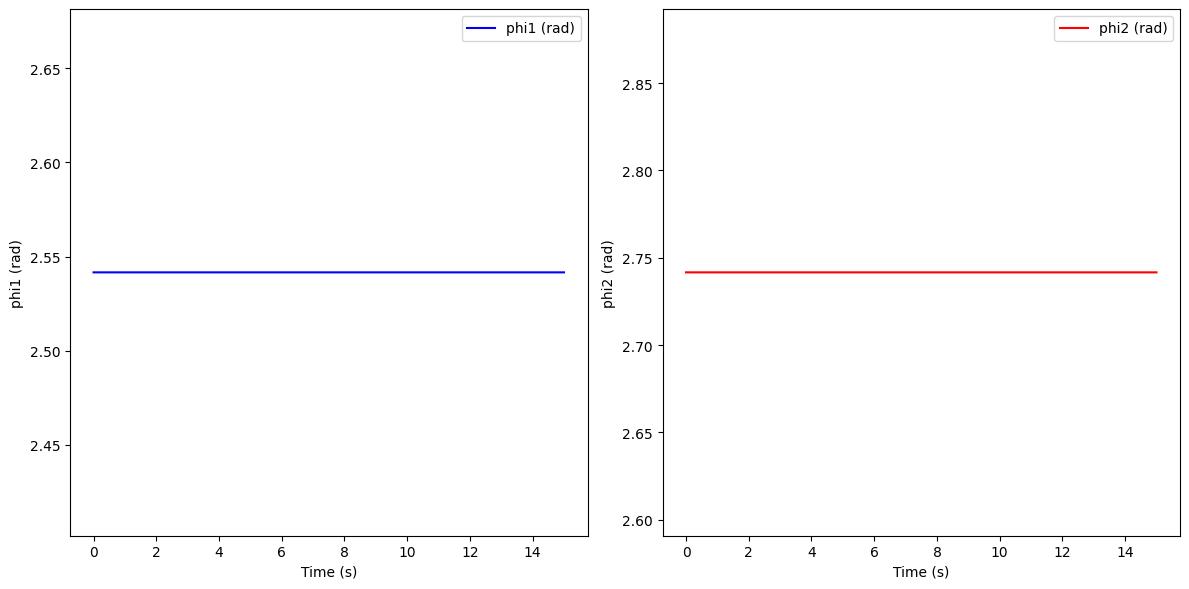

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations, combinations_with_replacement
from scipy.integrate import solve_ivp
from sympy import symbols
import multiprocessing

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Assuming sym_equations_rounded_simplified is defined earlier
sym_equations_rounded_simplified = [
    eq for eq in sym_equations_rounded_simplified if eq is not None
]

# Define the recovered ODE system based on the solutions
from itertools import permutations, combinations_with_replacement

# Define the recovered ODE system based on the solutions
if len(sym_equations_rounded_simplified) >= 2:
    # Generate all pairs including (eq1 = eq2) and both orders of (eq1, eq2)
    all_pairs = set(permutations(sym_equations_rounded_simplified, 2))  # Includes (eq1, eq2) and (eq2, eq1) for eq1 != eq2
    all_pairs.update(combinations_with_replacement(sym_equations_rounded_simplified, 2))  # Adds (eq1, eq1)

    for eq1, eq2 in all_pairs:
        ODE_func_phi1 = sp.lambdify([phi1, phi2, phi1_dot, phi2_dot], eq1, "numpy")
        ODE_func_phi2 = sp.lambdify([phi1, phi2, phi1_dot, phi2_dot], eq2, "numpy")


        def recovered_ode(t, y):
            phi1, phi2, phi1_dot, phi2_dot = y
            phi1_dot_new = ODE_func_phi1(phi1, phi2, phi1_dot, phi2_dot)
            phi2_dot_new = ODE_func_phi2(phi1, phi2, phi1_dot, phi2_dot)
            return [phi1_dot, phi2_dot, phi1_dot_new, phi2_dot_new]

        # Timeout settings
        timeout = 30  # 1 hour
        start_time = time.time()  # Track start time

        # Function to solve ODE in a separate process
        def solve_ode_process():
            try:
                sol = solve_ivp(recovered_ode, t_span, y0, t_eval=t_eval, method="LSODA")
                return sol
            except Exception as e:
                print(f"Error during simulation: {e}")
                return None

        # Create a process to solve the ODE system
        process = multiprocessing.Process(target=solve_ode_process)
        process.start()

        # Monitor the process and check for timeout
        process.join(timeout=timeout)  # Wait for the process to complete or timeout

        if process.is_alive():
            print("Timeout exceeded, terminating the ODE solver process.")
            process.terminate()  # Terminate the process if it exceeds timeout
            process.join()  # Ensure process cleanup
        else:
            # Process completed successfully within the timeout
            sol = solve_ode_process()

            # Check for valid results
            if sol is None or np.any(np.isnan(sol.y)) or np.any(np.isinf(sol.y)):
                print("Invalid values encountered in the simulation.")
            else:
                print(f'phi1: {eq1}')
                print(f'phi2: {eq2}')
                # Plot the results
                fig, axs = plt.subplots(1, 2, figsize=(12, 6))

                # Plot phi1
                axs[0].plot(sol.t, sol.y[0], label='phi1 (rad)', color='b')
                axs[0].set_xlabel('Time (s)')
                axs[0].set_ylabel('phi1 (rad)')
                axs[0].legend()

                # Plot phi2
                axs[1].plot(sol.t, sol.y[1], label='phi2 (rad)', color='r')
                axs[1].set_xlabel('Time (s)')
                axs[1].set_ylabel('phi2 (rad)')
                axs[1].legend()

                # Adjust layout and display the plots
                plt.tight_layout()
                plt.show()

else:
    print("Insufficient equations to define the ODE system.")
